# Machine Learning Foundation

## Section 2 Part D: Regularization and Gradient Descent

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Question 1

*   Import the data.

*   Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

*   Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [35]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/X_Y_Sinusoid_Data.csv")
data.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [36]:
X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

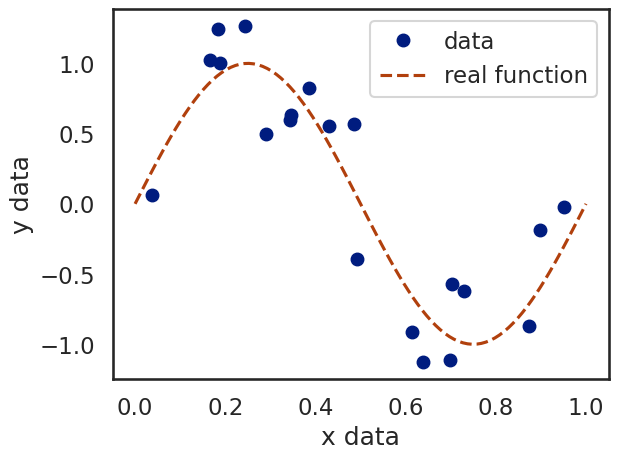

In [37]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

ax = data.set_index('x')['y'].plot(ls='', marker='o', label='data')
ax.plot(X_real, Y_real, ls='--', marker='', label='real function')

ax.legend()
ax.set(xlabel='x data', ylabel='y data')

## Question 2

*   Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
*   Fit this data using linear regression.
*   Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.


In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = 20
pf = PolynomialFeatures(degrees)
lr = LinearRegression()

In [39]:
X_data = data[['x']]
Y_data = data['y']

In [40]:
X_poly = pf.fit_transform(X_data)
lr.fit(X_poly, Y_data)

LinearRegression()

In [41]:
Y_pred = lr.predict(X_poly)

[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

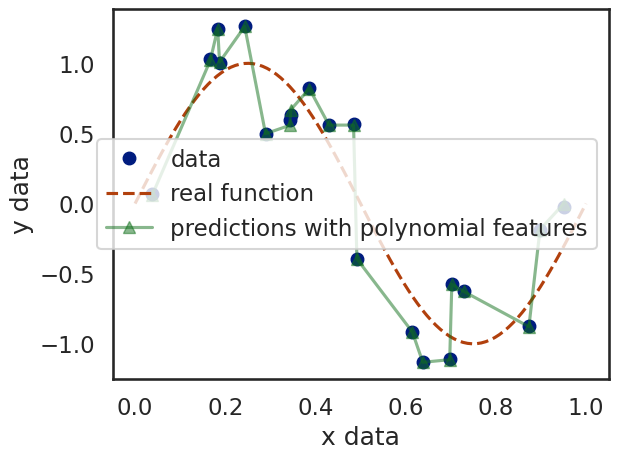

In [42]:
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions with polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data')

## Question 3

*   Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001).
*   Plot the results, as was done in Question 1.
*   Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude.

What does the comparatively large magnitude of the data tell you about the role of regularization?


In [43]:
from sklearn.linear_model import Ridge, Lasso

rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_r = rr.predict(X_poly)

In [44]:
ls = Lasso(alpha=0.0001)
ls = ls.fit(X_poly, Y_data)
Y_pred_ls = ls.predict(X_poly)

/home/mbarbaric/dev/python/IBM_Machine_Learning_Course/venv_ibm_machine_learning/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.470e-01, tolerance: 1.223e-03
  model = cd_fast.enet_coordinate_descent(


[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

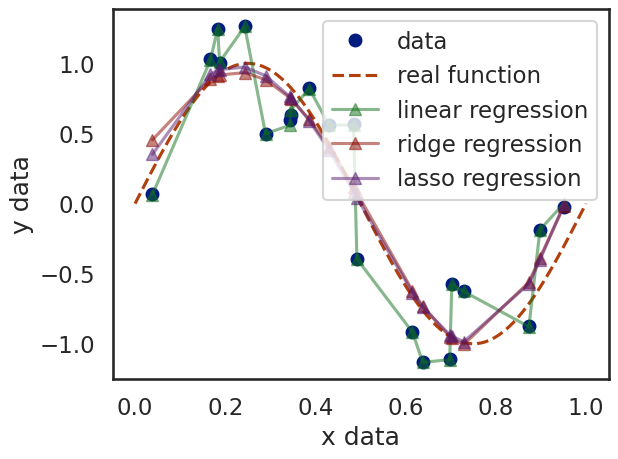

In [45]:
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_r, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_ls, label='lasso regression', marker='^', alpha=.5)
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data')

In [46]:
coefficients = pd.DataFrame()
coefficients['linear'] = lr.coef_.ravel()
coefficients['ridge'] = rr.coef_.ravel()
coefficients['lasso'] = ls.coef_.ravel()
coefficients = coefficients.applymap(abs)
coefficients.describe()

/tmp/ipykernel_10069/1199955772.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coefficients = coefficients.applymap(abs)


,linear,ridge,lasso
count,2.100000e+01,21.000000,21.000000
mean,5.786341e+13,2.169397,2.167284
std,6.005692e+13,2.900278,4.706731
min,1.613907e+07,0.000000,0.000000
25%,3.407774e+12,0.467578,0.000000
50%,3.625543e+13,1.017272,0.252181
75%,1.068105e+14,2.883507,1.641353
max,1.650270e+14,12.429635,20.176708


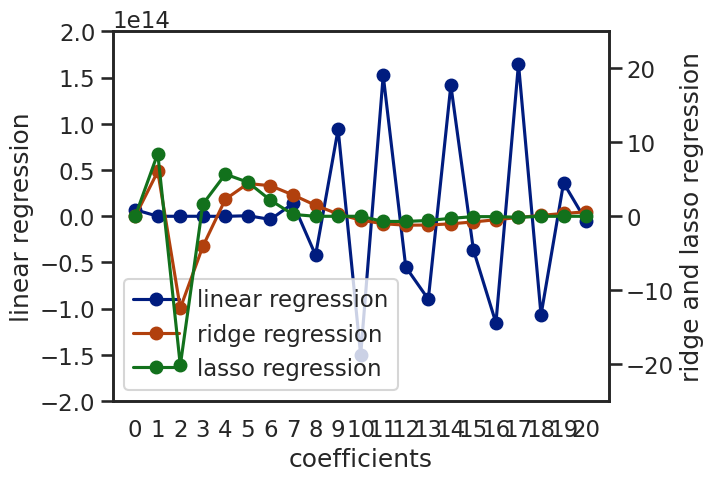

In [47]:
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(ls.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

## Question 4

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

*   Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
*   Split the data into train and test sets.
*   Log transform skewed features.
*   Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.


In [48]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/Ames_Housing_Sales.csv")
data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
5,796.0,566.0,320.0,NaN,1,1Fam,TA,No,732.0,0.0,...,0.0,Pave,5,796.0,AllPub,40.0,1993,1995,2009,143000.0
6,1694.0,0.0,0.0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,0.0,Pave,7,1686.0,AllPub,255.0,2004,2005,2007,307000.0
7,1107.0,983.0,0.0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,0.0,Pave,7,1107.0,AllPub,235.0,1973,1973,2009,200000.0
8,1022.0,752.0,0.0,NaN,2,1Fam,NaN,NaN,0.0,0.0,...,0.0,Pave,8,952.0,AllPub,90.0,1931,1950,2008,129900.0
9,1077.0,0.0,0.0,NaN,2,2fmCon,TA,No,851.0,0.0,...,0.0,Pave,5,991.0,AllPub,0.0,1939,1950,2008,118000.0


In [49]:
data = pd.get_dummies(data, drop_first=True)
data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,False,False,False,False,False,False,False,True,True,False
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,False,False,False,False,False,False,False,True,True,False
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,False,False,False,False,False,False,False,True,True,False
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,False,False,False,False,False,False,False,True,True,False
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,False,False,False,False,False,False,False,True,True,False
5,796.0,566.0,320.0,1,732.0,0.0,1,0,64.0,0.0,...,False,False,False,False,False,False,False,True,True,False
6,1694.0,0.0,0.0,3,1369.0,0.0,1,0,317.0,0.0,...,False,False,False,False,False,False,False,True,True,False
7,1107.0,983.0,0.0,3,859.0,32.0,1,0,216.0,228.0,...,False,False,False,False,False,False,False,True,True,False
8,1022.0,752.0,0.0,2,0.0,0.0,0,0,952.0,205.0,...,False,False,False,False,False,False,False,True,True,False
9,1077.0,0.0,0.0,2,851.0,0.0,1,0,140.0,0.0,...,False,False,False,False,False,False,False,True,True,False


In [50]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=0)

In [51]:
mask = (data.dtypes == float)

In [52]:
float_cols = data.columns[mask]
float_cols

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea',
       'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF',
       'SalePrice'],
      dtype='object')

In [53]:
skew_limit = 0.75
skew_vals = train[float_cols].skew()
skew_vals

1stFlrSF          1.549773
2ndFlrSF          0.792860
3SsnPorch        11.346364
BsmtFinSF1        2.066474
BsmtFinSF2        4.037059
BsmtUnfSF         0.913069
EnclosedPorch     3.226552
GarageArea        0.834441
GarageYrBlt      -0.685456
GrLivArea         1.543132
LotArea          11.329925
LotFrontage       3.048223
LowQualFinSF     11.062503
MasVnrArea        2.568326
MiscVal          26.671550
OpenPorchSF       2.176337
PoolArea         14.054231
ScreenPorch       4.572122
TotalBsmtSF       1.976091
WoodDeckSF        1.582506
SalePrice         1.965767
dtype: float64

In [54]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0: 'Skew'})
             .query(f"abs(Skew) > {skew_limit}"))
skew_cols

,Skew
MiscVal,26.671550
PoolArea,14.054231
3SsnPorch,11.346364
LotArea,11.329925
LowQualFinSF,11.062503
ScreenPorch,4.572122
BsmtFinSF2,4.037059
EnclosedPorch,3.226552
LotFrontage,3.048223
MasVnrArea,2.568326


In [55]:
for col in skew_cols.index.to_list():
    if col == 'SalePrice':
        continue
    train[col] = np.log1p(train[col])
    test[col] = test[col].apply(np.log1p)

In [56]:
y_column = 'SalePrice'

feature_cols = [x for x in train.columns if x != y_column]
X_train = train[feature_cols]
y_train = train[y_column]

X_test = test[feature_cols]
y_test = test[y_column]

## Question 5

*   Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.
*   Fit a basic linear regression model
*   print the root-mean-squared error for this model
*   plot the predicted vs actual sale price based on the model.

In [57]:
from sklearn.metrics import mean_squared_error

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = lr.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

37940.151387088146

[Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Predicted Price'),
 (0.0, 755000.0),
 (0.0, 755000.0),
 Text(0.5, 1.0, 'Linear Regression Results')]

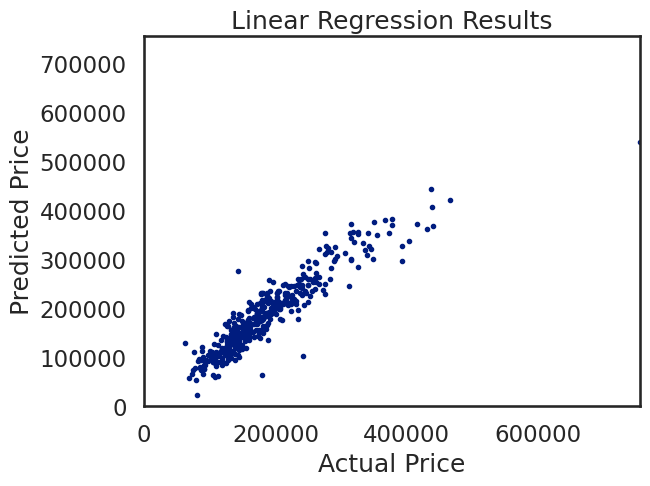

In [60]:
f = plt.Figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, y_pred, marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price',
       ylabel='Predicted Price',
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results')

## Question 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

*   Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
*   Use $$\[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
*   Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.


In [61]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, cv=4)
ridgeCV.fit(X_train, y_train)

RidgeCV(alphas=[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80], cv=4)

In [62]:
ridgeCV_predict = ridgeCV.predict(X_test)

In [70]:
ridgeCV_rmse = root_mean_squared_error(y_test, ridgeCV_predict)
print(ridgeCV.alpha_, ridgeCV_rmse)

15.0 28541.2250031435


## Question 7

Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

*   Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
*   Repeat this with the Elastic net model.
*   Compare the results via table and/or plot.

Use the following alphas:\
`[1e-5, 5e-5, 0.0001, 0.0005]`


In [67]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(
    alphas=alphas2,
    cv=3
)

lassoCV.fit(X_train, y_train)

/home/mbarbaric/dev/python/IBM_Machine_Learning_Course/venv_ibm_machine_learning/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144740341658.5005, tolerance: 436271148.164196
  model = cd_fast.enet_coordinate_descent_gram(
/home/mbarbaric/dev/python/IBM_Machine_Learning_Course/venv_ibm_machine_learning/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144710876538.5003, tolerance: 436271148.164196
  model = cd_fast.enet_coordinate_descent_gram(
/home/mbarbaric/dev/python/IBM_Machine_Learning_Course/venv_ibm_machine_learning/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

LassoCV(alphas=array([1.e-05, 5.e-05, 1.e-04, 5.e-04]), cv=3)

In [69]:
lassoCV_pred = lassoCV.predict(X_test)
lassoCV_rmse = root_mean_squared_error(y_test, lassoCV_pred)
print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

0.0005 41726.300872660024


In [72]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=int(1e4))
elasticNetCV.fit(X_train, y_train)

/home/mbarbaric/dev/python/IBM_Machine_Learning_Course/venv_ibm_machine_learning/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184687786687.8509, tolerance: 492334513.91441447
  model = cd_fast.enet_coordinate_descent_gram(
/home/mbarbaric/dev/python/IBM_Machine_Learning_Course/venv_ibm_machine_learning/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182981486747.2041, tolerance: 520747227.36485034
  model = cd_fast.enet_coordinate_descent_gram(
/home/mbarbaric/dev/python/IBM_Machine_Learning_Course/venv_ibm_machine_learning/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

ElasticNetCV(alphas=array([1.e-05, 5.e-05, 1.e-04, 5.e-04]),
             l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
             max_iter=10000)

In [73]:
elasticNetCV_pred = elasticNetCV.predict(X_test)

In [75]:
elasticNetCV_rmse = root_mean_squared_error(y_test, elasticNetCV_pred)

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0005 0.1 32029.970555941214


In [77]:
rmse_vals = [rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]
labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=True)
rmse_df

,RMSE
Linear,37940.151387
Ridge,28541.225003
Lasso,41726.300873
ElasticNet,32029.970556


## Question 8

Let's explore Stochastic gradient descent in this exercise.\
Recall that Linear models in general are sensitive to scaling.
However, SGD is *very* sensitive to scaling.\
Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

*   Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
*   Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above.
*   Do not scale the data before fitting the model.
*   Compare the results to those obtained without using stochastic gradient descent.


In [81]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': None},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = root_mean_squared_error(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD
Linear,37940.151387,3.928753e+14
Ridge,28541.225003,6.398476e+15
Lasso,41726.300873,1.902507e+15
ElasticNet,32029.970556,6.080219e+15


In [82]:
# Import SGDRegressor and prepare the parameters

model_parameters_dict = {
    'Linear': {'penalty': None},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = root_mean_squared_error(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate
Linear,37940.151387,3.928753e+14,74936.209809
Ridge,28541.225003,6.398476e+15,75062.247124
Lasso,41726.300873,1.902507e+15,74598.476157
ElasticNet,32029.970556,6.080219e+15,80446.441396


In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = root_mean_squared_error(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,37940.151387,3.928753e+14,74936.209809,28197.319945
Ridge,28541.225003,6.398476e+15,75062.247124,78030.289847
Lasso,41726.300873,1.902507e+15,74598.476157,28135.422216
ElasticNet,32029.970556,6.080219e+15,80446.441396,28122.735038
